In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 2

@author: yaning
"""

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [6]:
path = "/home/yaning/Documents/Spiking_NN/with_learning/"
firing_array = np.load(path + "firing.npy")

In [7]:
# double complex network structure
num_input = 3
num_excit_main = 2
num_excit_sub = 2
num_inhibit_main = 2
num_inhibit_sub = 2
num_output = 2

input_y = np.linspace(-0.8, 0.8, num_input)
input_pos = np.column_stack((np.full_like(input_y, -0.9), input_y))

excit_main_x = np.linspace(-0.2, 0.2, num_excit_main)
excit_main_pos = np.column_stack((excit_main_x, np.full_like(excit_main_x, 0.4)))
    
excit_sub_x = np.linspace(-0.2, 0.2, num_excit_sub)
excit_sub_pos = np.column_stack((excit_sub_x, np.full_like(excit_sub_x, 0.8)))

inhibit_main_x = np.linspace(-0.2, 0.2, num_inhibit_main)
inhibit_main_pos = np.column_stack((inhibit_main_x, np.full_like(inhibit_main_x, -0.4)))
    
inhibit_sub_x = np.linspace(-0.2, 0.2, num_inhibit_sub)
inhibit_sub_pos = np.column_stack((inhibit_sub_x, np.full_like(inhibit_sub_x, -0.8)))

output_y = np.linspace(-0.1, 0.1, num_output)
output_pos = np.column_stack((np.full_like(output_y, 0.9), output_y))

all_pos = np.vstack((input_pos, excit_main_pos, excit_sub_pos, inhibit_main_pos,
                    inhibit_sub_pos, output_pos))

In [8]:
# # simple network structure
# num_input = 3
# num_excit_main = 1
# num_excit_sub = 1
# num_inhibit_main = 1
# num_inhibit_sub = 1
# num_output = 1

# input_y = np.linspace(-0.8, 0.8, num_input)
# input_pos = np.column_stack((np.full_like(input_y, -0.9), input_y))

# excit_main_pos = [[0, 0.4]]
# excit_sub_pos = [[0, 0.8]]

# inhibit_main_pos = [[0, -0.4]]
# inhibit_sub_pos = [[0, -0.8]]

# output_pos = [[0.9, 0]]


# all_pos = np.vstack((input_pos, excit_main_pos, excit_sub_pos, inhibit_main_pos,
#                     inhibit_sub_pos, output_pos))

In [9]:
# # 3 input, 2 neuron_main, 1 output

# input_y = np.linspace(-0.8, 0.8, 3)
# input_pos = np.column_stack((np.full_like(input_y, -0.9), input_y))

# excit_main_0_pos = [[0, 0.4]]
# excit_main_1_pos = [[0, -0.4]]

# output_pos = [[0.9, 0]]


# all_pos = np.vstack((input_pos, excit_main_0_pos, excit_main_1_pos, output_pos))

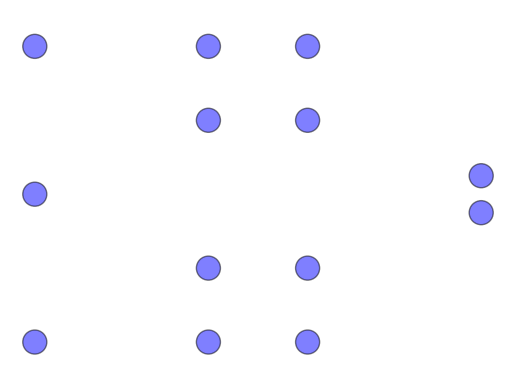

In [10]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axis('off')

scatter = ax.scatter(
    all_pos[:, 0], all_pos[:, 1], s=300, c='blue', edgecolors='black', alpha=0.5
)

# Animation function
def update(frame):
    firing = firing_array[:, frame]
    colors = ['red' if fire else 'blue' for fire in firing]
    scatter.set_facecolors(colors)  
    return scatter,

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=firing_array.shape[1], interval=50, blit=True
)

ani.save('neuron_animation.mp4', writer='ffmpeg')

plt.show()
